In [330]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re

In [331]:
#genre_dict line is to map the document with genre ID numbers but not numbers.
genre_dict = {"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}
df_ratings=pd.read_csv('imdb.title.ratings.csv.gz')
df_basics=pd.read_csv('imdb.title.basics.csv.gz')
df_gross=pd.read_csv('bom.movie_gross.csv.gz')
df_name_basics=pd.read_csv('imdb.name.basics.csv.gz')
df_title_akas=pd.read_csv('imdb.title.akas.csv.gz')
df_budget=pd.read_csv('tn.movie_budgets.csv.gz')

In [332]:
df_ratings.head()
df_ratings.sort_values(by='numvotes',ascending=False)
#Would like to get movie titles, genres, and studios in this table to make more useful conclusions.
#Filter out ones with low amounts of numvotes

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655
...,...,...,...
39180,tt8050582,8.0,5
33886,tt6449270,4.0,5
22243,tt3819584,7.6,5
49605,tt2136926,5.8,5


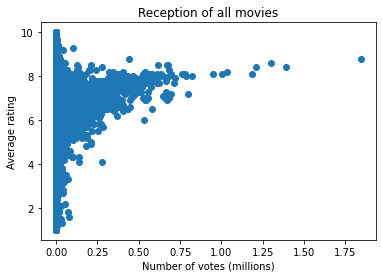

Correlation between ratings and other variables: 


numvotes         0.044478
averagerating    1.000000
Name: averagerating, dtype: float64

In [333]:
fig, ax=plt.subplots()
popularity_subplot=ax.scatter(df_ratings['numvotes']/1e6,df_ratings['averagerating'])
ax.set_xlabel('Number of votes (millions)')
ax.set_ylabel('Average rating')
ax.set_title('Reception of all movies')
plt.show()

df_ratings.describe()

#Show correlations (nothing very useful from this table, but this is often helpful)
print('Correlation between ratings and other variables: ')
df_ratings.corr()['averagerating'].sort_values()

In [334]:
df_ratings.isna().any()

tconst           False
averagerating    False
numvotes         False
dtype: bool

In [335]:
#df_ratings_and_basics = pd.concat([df_ratings, df_basics], axis=1, join='inner')???

In [336]:
df_ratings_basics=df_ratings.merge(df_basics)

In [337]:
df_ratings_basics.sort_values(by='numvotes',ascending=False)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
63498,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
8738,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
24920,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
38058,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
48221,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
39180,tt8050582,8.0,5,Jackal Stories,Cuentos de chacales,2017,70.0,Documentary
33886,tt6449270,4.0,5,Chu lian wei man,Chu lian wei man,2013,105.0,"Drama,Romance"
22243,tt3819584,7.6,5,De onderkoning: strijd om de grondwet,De onderkoning: strijd om de grondwet,2014,51.0,Drama
49605,tt2136926,5.8,5,Fools,Fools,2011,77.0,"Action,Comedy,Horror"


In [338]:
df_ratings_basics.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [339]:
df_ratings_basics.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [353]:
df_ratings_basics.insert(9,'Adventure',0)

In [354]:
df_ratings_basics.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adventure
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,0,0
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,0,0
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,0,0
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",0,0


In [355]:
#df_ratings_basics.concat ???
#.merge provides the most flexibility

#Would also like to get ratings and gross into the table right above this one.
#Can easily make a new table without certain records we don't want. Filtering works here.

In [356]:
df_gross.head()
df_gross.sort_values(by='domestic_gross',ascending=False)

#fig, ax=plt.subplots()
#popularity_subplot=ax.scatter(df_gross['year'],df_gross['domestic_gross'])
#ax.set_xlabel('Year')
#ax.set_ylabel('Domestic gross ($100,000,000)')
#ax.set_title('Success of movies by year')
#plt.show()

#Show correlations (nothing very useful from this table, but this is often helpful)
print('Correlation between domestic gross and other variables: ')
df_gross.corr()['domestic_gross'].sort_values()

Correlation between domestic gross and other variables: 


year              0.018708
domestic_gross    1.000000
Name: domestic_gross, dtype: float64

In [357]:
#df_name_basics.head()
#Analyze this table later on if necessary. Focus on main questions first.

In [358]:
#df_title_akas.head()
#Analyze this table later on if necessary. Focus on main questions first.

In [359]:
df_basics.head(25)
#How to deal with comma-separated genres and break those apart. Use different columns?
#Create 3 columns? Analysis on top genres/studios/writers would be helpful.

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [360]:
df_gross.head()
#Insert a profit column? gross-budget?

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [361]:
df_gross_basics=df_basics.merge(df_gross, left_on='primary_title',right_on='title')
df_gross_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000,2012
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000,2012
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000,2012
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000,2012


In [362]:
df_budget.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [370]:
#df_budget.insert(7,'Profit',['domestic_gross'-'production_budget'])

In [371]:
#df_budget.insert(2, 'Profit', ['domestic_gross'-'production_budget'], True) 
#df_budget.head()

In [372]:
#df_gross_budget_basics=df_gross_basics.merge(df_budget,left_on='title',right_on='movie')
#df_gross_budget_basics.head(25)

In [373]:
#Documentaries, sports movies? (And which ones would be considered sports movies?)
#Critic, customer reviews (Assuming Microsoft is more interested in critic reviews b/c more potentialpositive publicity there)
#Top writers, studios (recruiting)
#Most popular (stars), highest grossing ($)
#(Determine which studios are which)

#Diversity/inclusion (may need to set this aside, put in next steps)